In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [3]:
# here we generate our data

X = 6* np.random.rand(200,1) -3
y = 0.8 * X**2 + 0.9 *X +2 + np.random.randn(200,1)

# y = 0.8 x^2 + 0.9x +2
# using this above question, we have generated our dataset.
# the job of our model is the find the coef of x^2, x and intercept.

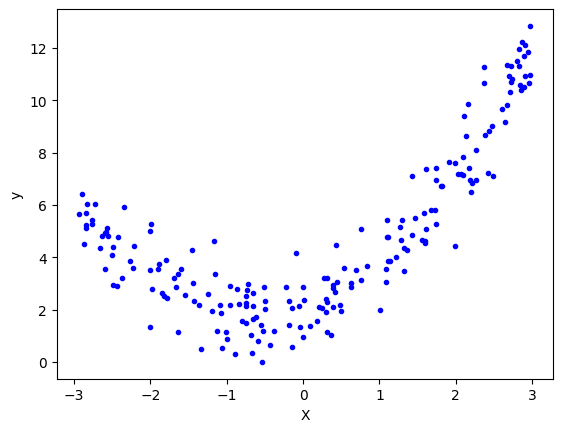

In [4]:
plt.plot(X,y, 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [5]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

# First, we will apply normal linear regression

In [6]:
# applying linear regression
lr = LinearRegression()

In [7]:
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.19029285633262583

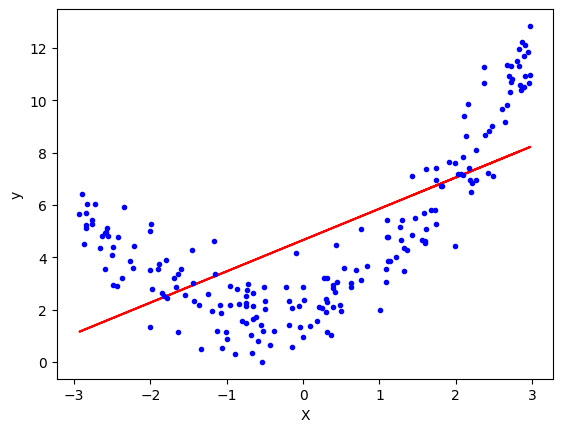

In [9]:
# plotting the regression line

plt.plot(X_train, lr.predict(X_train), color ='r')
plt.plot(X,y, 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

**we can see that the line does not fit our non-linear data**

# Applying Polynomial Linear Regression

In [10]:
# degree 2

poly = PolynomialFeatures(degree=2, include_bias = True)
# bias represents the intercept term.

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [11]:
print(X_train[0])
print(X_train_trans[0])

[2.83014193]
[1.         2.83014193 8.00970334]


In [12]:
lr = LinearRegression()
lr.fit(X_train_trans , y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(X_test_trans)

In [14]:
r2_score(y_test, y_pred)

0.819954830506207

In [15]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.97297074 0.78082996]]
[2.13677313]


**we can see that we have reached very close to our actual values**

In [16]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)


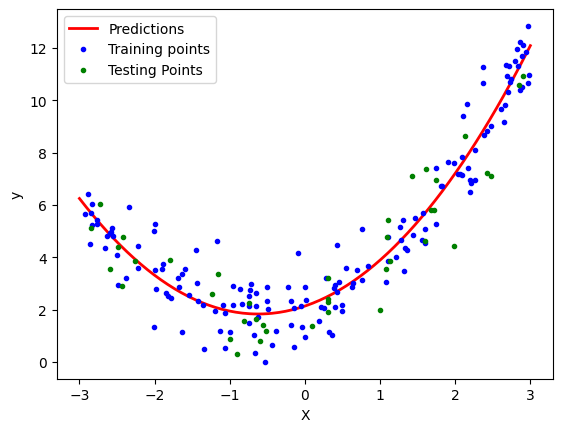

In [17]:
plt.plot(X_new, y_new, "r-", linewidth =2, label ="Predictions")
plt.plot(X_train, y_train, "b.", label = 'Training points')
plt.plot(X_test, y_test, "g.", label = 'Testing Points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [21]:
def polynomial_regression(degree):
    X_new = np.linspace(-3,3,100).reshape(100,1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree = degree, include_bias = False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler" , std_scaler),
        ("lin_reg", lin_reg)
    ])

    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new , y_newbig, 'r' , label="Degree" + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth =3)
    plt.legend(loc ="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3,3-0,10])
    plt.show()

TypeError: ignored

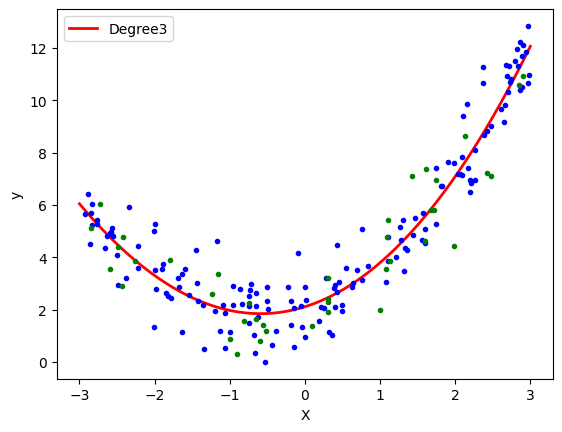

In [22]:
polynomial_regression(3)

TypeError: ignored

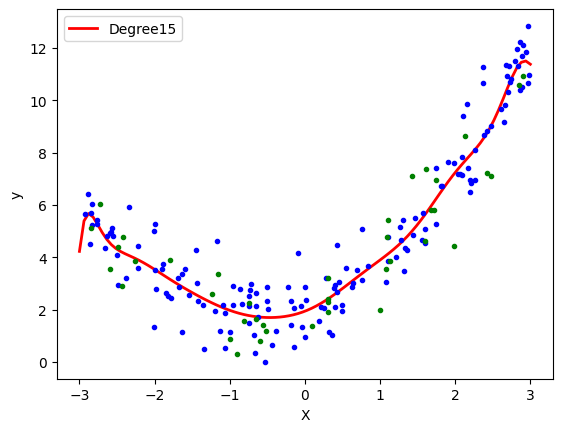

In [23]:
polynomial_regression(15)

**we can see that the model is over-fitting as we increase the degree of polynomial**

**if we keep the degree too low then the model may underfit**

# Till now we saw simple polynomial regression ( one input and one output col). Now we will see for multiple polynomial regression ( multiple input cols)

In [25]:
# 3D polynomial regression

x = 7 * np.random.rand(100,1) - 2.8
y = 7 * np.random.rand(100,1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y +0.1*x*y +2 + np.random.randn(100,1)
# z = x^2 + y^2 + 0.2x + 0.2y +0.1xy +2

In [26]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel() , y=y.ravel(), z=z.ravel())
fig.show()

In [27]:
# applying simple LR

lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min() , y.max() ,10)
xGrid, yGrid = np.meshgrid(x_input, y_input)

final = np.vstack((xGrid.ravel().reshape(1,100), yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [28]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x = x_input, y = y_input , z=z_final))

fig.show()

**here we try to plot a linear hyperplane for our data. we can see that the data cannot be accurately justified with the help of this plane.**

In [29]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [30]:
poly = PolynomialFeatures(degree=3)
X_multi_trans = poly.fit_transform(X_multi)


In [32]:
print("Input",poly.n_input_features_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

AttributeError: ignored

In [33]:
X_multi_trans.shape

(100, 10)

In [34]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [35]:
X_test_multi = poly.transform(final)

In [36]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [37]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()